In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/sophie/projects/Titanic/data/train.csv', header=0)

In [81]:
# This is the best way to find null values in a dataframe.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
# Make an empty panel to store 3d data. (x,y,z)=(items, major_axis, minor_axis)
# filled with 0s to begin with. 
survival_table = pd.Panel(data = 0,items=['F', 'M'],major_axis=[0,1,2],minor_axis=[0,1,2,3])

In [83]:
print(survival_table.shape)
print(survival_table.values)  # looks good!

(2, 3, 4)
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [84]:
# add a column to the dataframe which tells us which of the Fare bins the passenger is in.
# We define them an $0-9, $10-19, $20-29 and $30-39. If the fare is greater than $40 they get label 4. 

def binfare(x):
    if x < 10: 
        return 0
    elif (x >=10) & (x <20) : return 1   
    elif (x >=20) & (x <30) : return 2
    else: return 3

# Make a new column with Fares in bins
df['Farebin'] = df['Fare'].map(binfare)

In [85]:
# Make a new column to turn female/ male to 1/0, called Gender
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

print(df['Gender'][0:5])

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64


This tells us that:      
- no women in first class paid \$0-19 for their tickets
- no men in first class paid \$10-19 for their tickets
- no women in second class paid \$0-9 for their tickets


Lets look at the survival rates for each feature

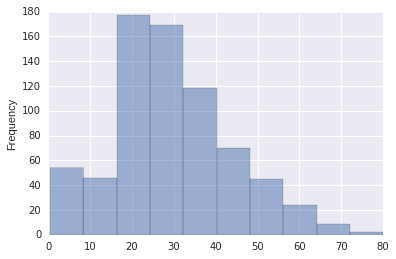

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

df['Age'].plot.hist(alpha=0.5)

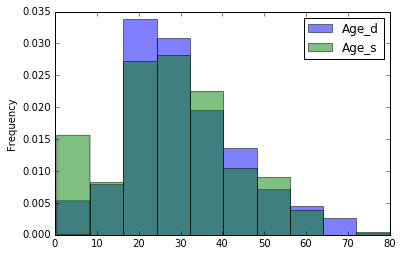

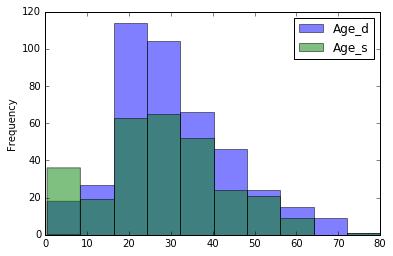

In [59]:
# Add two extra columns with Survived blacked out. 
df['Age_d'] = df['Age'][df['Survived'] == 0]  # The ages of people who died
df['Age_s'] = df['Age'][df['Survived'] == 1]  # The ages of people who survived

df[['Age_d','Age_s']].plot.hist(alpha=0.5, normed=True) # these are normalized using all data
df[['Age_d','Age_s']].plot.hist(alpha=0.5) 

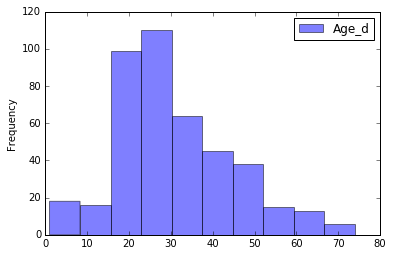

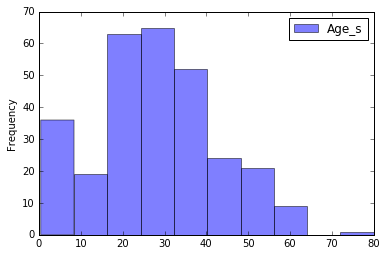

In [58]:
df[['Age_d']].plot.hist(alpha=0.5)
df[['Age_s']].plot.hist(alpha=0.5)

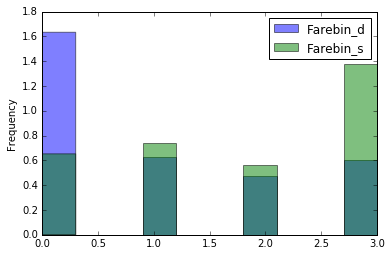

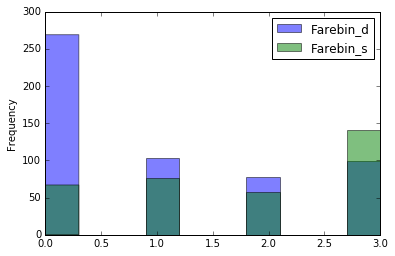

In [60]:
# Add two extra columns with Survived blacked out. 
df['Farebin_d'] = df['Farebin'][df['Survived'] == 0]  # The Fare prices of people who died
df['Farebin_s'] = df['Farebin'][df['Survived'] == 1]  # The Fare prices of people who survived


df[['Farebin_d','Farebin_s']].plot.hist(alpha=0.5, normed=True) # these are normalized using all data
df[['Farebin_d','Farebin_s']].plot.hist(alpha=0.5) 

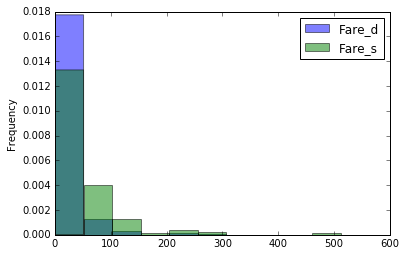

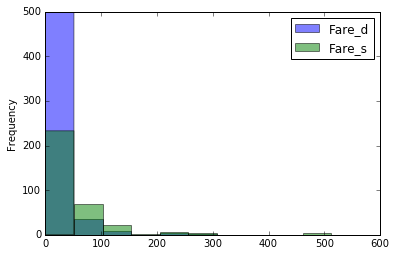

In [61]:
# Add two extra columns with Survived blacked out. 
df['Fare_d'] = df['Fare'][df['Survived'] == 0]  # The Fare prices of people who died
df['Fare_s'] = df['Fare'][df['Survived'] == 1]  # The Fare prices of people who survived


df[['Fare_d','Fare_s']].plot.hist(alpha=0.5, normed=True) # these are normalized using all data
df[['Fare_d','Fare_s']].plot.hist(alpha=0.5) 

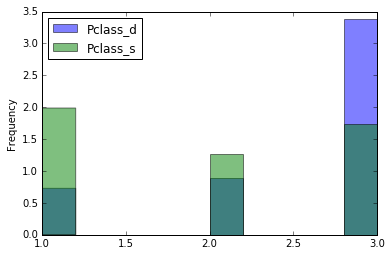

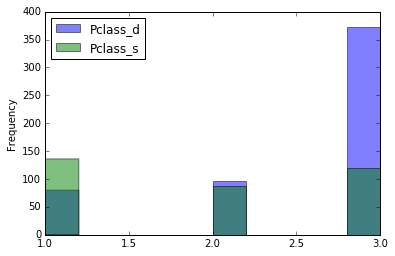

In [72]:
# Looking at class
# Add two extra columns with Survived blacked out. 
df['Pclass_d'] = df['Pclass'][df['Survived'] == 0]  # The Fare prices of people who died
df['Pclass_s'] = df['Pclass'][df['Survived'] == 1]  # The Fare prices of people who survived


df[['Pclass_d','Pclass_s']].plot.hist(alpha=0.5, normed=True) # these are normalized using all data
df[['Pclass_d','Pclass_s']].plot.hist(alpha=0.5) 

### These plots could be really useful!

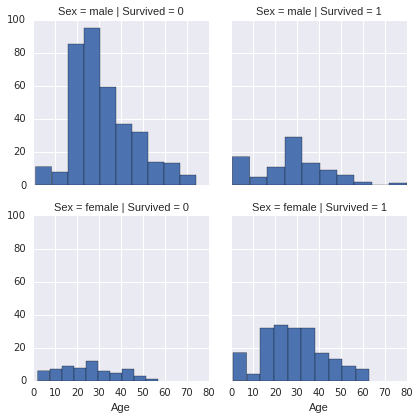

In [78]:
import seaborn as sns
g = sns.FacetGrid(df, row="Sex", col="Survived")
g.map(plt.hist, "Age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82262660f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f82243c4860>]], dtype=object)

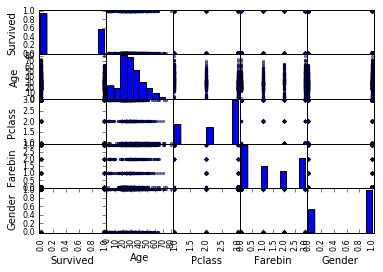

In [30]:
pd.scatter_matrix(df[['Survived','Age','Pclass','Farebin','Gender']])